In [1]:
from gpt import GPT
from distgen import Generator
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update(
    {"font.size": 20, "lines.linewidth": 2.5, "figure.figsize": (10, 6)}
)
from scipy.io import loadmat
from distgen.plot import plot_dist2d

This notebook checks consistency between gpt input function and distgen.

Note:
- $\sigma_{px}^2 / m = $ MTE
- $\gamma * m * c * \beta_x  = p_x$
- setGBxemittance value in gpt input file is $\sigma_{\beta x} * \sigma_x$


In [2]:
gen = Generator("../beamline/uniform.in.yaml", verbose=1)
gen["start:MTE:value"] = 30
gen["r_dist:max_r:value"] = 0.8 # ~ 1e-7 sigma_beta_x * sigma_x
gen.run()
print(gen)

Distribution format: gpt
Output file: rad.uniform.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 15 pC.
   Number of macroparticles: 10000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 0.8 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -150 ps, max_t = 150 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 123.814 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 123.814 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 123.814 eV/c
   Shifting avg_x = -0.000119548 mm -> 0 mm
   Scaling sigma_x = 0.399886 mm -> 0.4 mm
   Shifting avg_y = -2.2185E-05 mm -> 0 mm
   Scaling sigma_y = 0.40001 mm -> 0.4 mm
   Shifting avg_px = -0.114503 eV/c -> 0 eV/c
   Scaling sigma_px = 123.781 eV/c -> 123.814 eV/c
   Shifting avg_py = -0.178673 eV/c -> 0 eV/c
   Scaling sigma_py 

Distribution format: gpt
Output file: rad.uniform.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 15 pC.
   Number of macroparticles: 10000.
   Assuming cylindrical symmetry...
   r distribution: radial uniform
      min_r = 0 mm, max_r = 0.8 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -150 ps, max_t = 150 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 123.814 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 123.814 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 123.814 eV/c
   Shifting avg_x = -0.000119548 mm -> 0 mm
   Scaling sigma_x = 0.399886 mm -> 0.4 mm
   Shifting avg_y = -2.2185E-05 mm -> 0 mm
   Scaling sigma_y = 0.40001 mm -> 0.4 mm
   Shifting avg_px = -0.114503 eV/c -> 0 eV/c
   Scaling sigma_px = 123.781 eV/c -> 123.814 eV/c
   Shifting avg_py = -0.178673 eV/c -> 0 eV/c
   Scaling sigma_py 

<AxesSubplot:title={'center':'$<x>$ = -1.38778E-14 µm, $\\sigma_{x}$ = 400 µm\n$<y>$ = -4.85723E-14 µm, $\\sigma_{y}$ = 400 µm'}, xlabel='$x$ (µm)', ylabel='$y$ (µm)'>

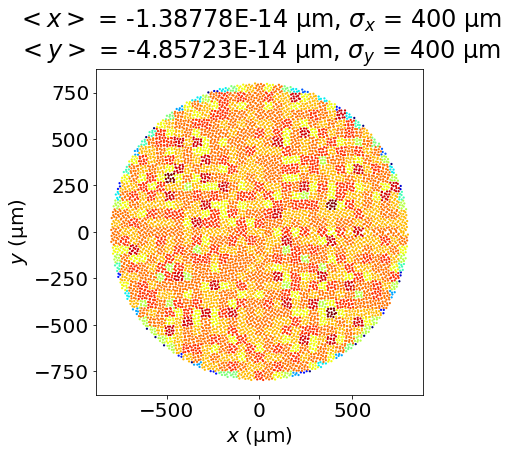

In [3]:
beam = gen.beam()
plot_dist2d(beam, "x", "um", "y", "um", axis="equal", title_on=True)

# Why $\sigma_x = R/2$

$\sigma_x^2 = 1 / \pi R^2 * \int_{-R}^{R} x^2 * 2y dx $

Interestingly,
$\sigma_r =  \sqrt {\int r^2 dr / R} = R / \sqrt(3)$

In [4]:
G1 = GPT(input_file="test.in", initial_particles=gen.particles, verbose=True)
G2 = GPT(input_file="test.in", verbose=True)
G2.set_variables({"distgen": 0})

G1.run(gpt_verbose=False)
G2.run()

print(G1)
print(G2)

GPT.configure_gpt:
   Original input file "test.in" in "/nfs/user/jb2483/big_gun/distgen_consistency_check"
   Configured to run in "/tmp/tmpcrmeub3d"
GPT.configure_gpt:
   Original input file "test.in" in "/nfs/user/jb2483/big_gun/distgen_consistency_check"
   Configured to run in "/tmp/tmp2_9cs33s"
GPT.run_gpt:
   Initial particles written to "/tmp/tmpcrmeub3d/gpt.particles.gdf"
   Running GPT...
   Writing gpt input file to "/tmp/tmpcrmeub3d/test.in"
   Running with timeout = None sec.
   Loading GPT data from /tmp/tmpcrmeub3d/test.out.gdf
   GDF data loaded, time ellapsed: 0.0414817 (sec).
   Converting tout and screen data to ParticleGroup(s)
   Run finished, total time ellapsed: 3.9819 (sec)
GPT.run_gpt:
   Running GPT...
   Writing gpt input file to "/tmp/tmp2_9cs33s/test.in"
   Running with timeout = None sec.
   Loading GPT data from /tmp/tmp2_9cs33s/test.out.gdf
   GDF data loaded, time ellapsed: 0.0365105 (sec).
   Converting tout and screen data to ParticleGroup(s)
   Run f

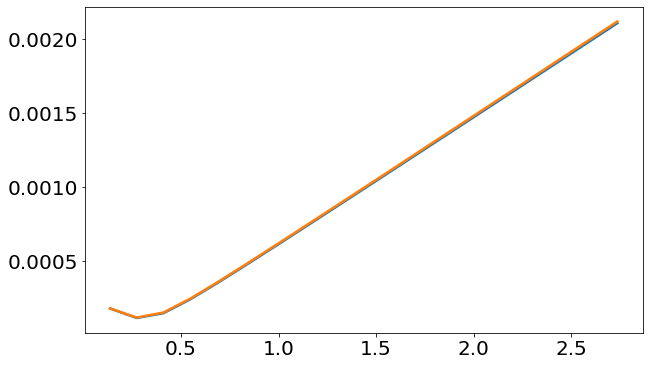

In [5]:
plt.plot(G1.stat('mean_z', 'screen'), G1.stat('sigma_x', 'screen'))
plt.plot(G2.stat('mean_z', 'screen'), G2.stat('sigma_x', 'screen'))